In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/drive/MyDrive/WORKING/Federated_Learning/AnoFED_ALI/ECG5000.zip /content/

Mounted at /content/drive


Archive:  ECG5000.zip
replace ECG5000.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000.txt             
replace ECG5000_TEST.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TEST.arff       
replace ECG5000_TEST.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TEST.txt        
replace ECG5000_TRAIN.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TRAIN.arff      
replace ECG5000_TRAIN.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TRAIN.txt       
replace ECG5000_TEST.ts? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TEST.ts         
replace ECG5000_TRAIN.ts? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ECG5000_TRAIN.ts        
   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870

<ipython-input-14-e533839a8750>:59: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('ecg_final.txt',sep='  ',header=None)


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 140, 1)]             0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 140, 1)               3         ['input_2[0][0]']             
 ial)                                                                                             
                                                                                                  
 patch_encoder (PatchEncode  (None, 140, 10)              30        ['data_augmentation[0][0]']   
 r)                                                                                               
                                                                                            

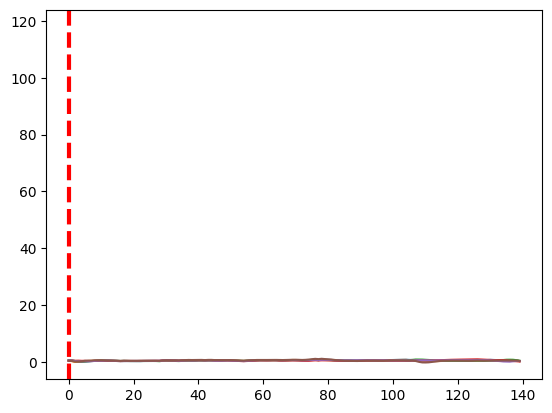

32/32 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       563
         1.0       0.96      1.00      0.98       437

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

14/14 [==============================] - 0s 6ms/step


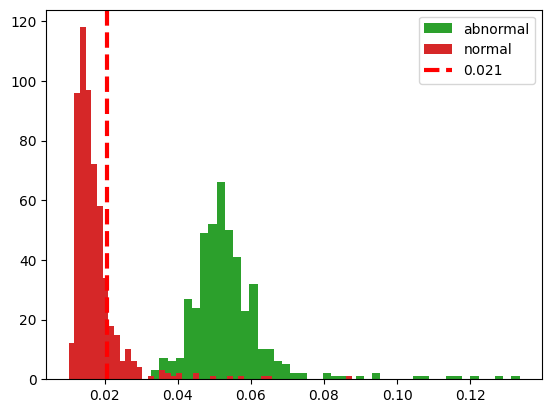

14/14 [==============================] - 0s 6ms/step


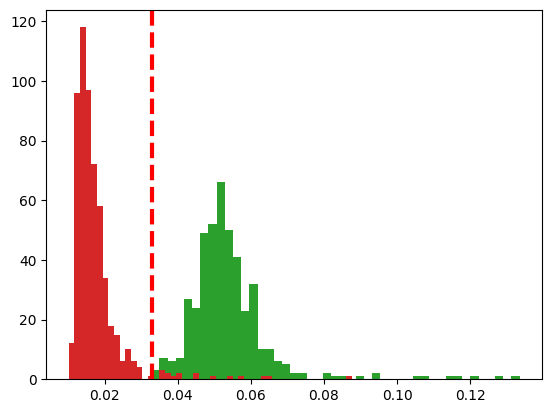

32/32 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       563
         1.0       0.96      1.00      0.98       437

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

0.0018532309368911933  is greater 0.0018532309368911933
limits: 0 10
loss of window 0.0018532309368911933
remaining loss 0.00046953531601009383
0.003306871614266734  is greater 0.0018532309368911933
limits: 10 20
loss of window 0.003306871614266734
remaining loss -0.000984105361365447
loss of window 0.002049225016198034
remaining loss 0.00027354123670325333
loss of window 0.0012750952621534825
remaining loss 0.0010476709907478047
loss of window 0.000915246235508939
remaining loss 0.0014075200173923482
0.007067000107311613  is greater 0.003306871614266734
limits: 50 60
loss of window 0.007067000107311613
remaining

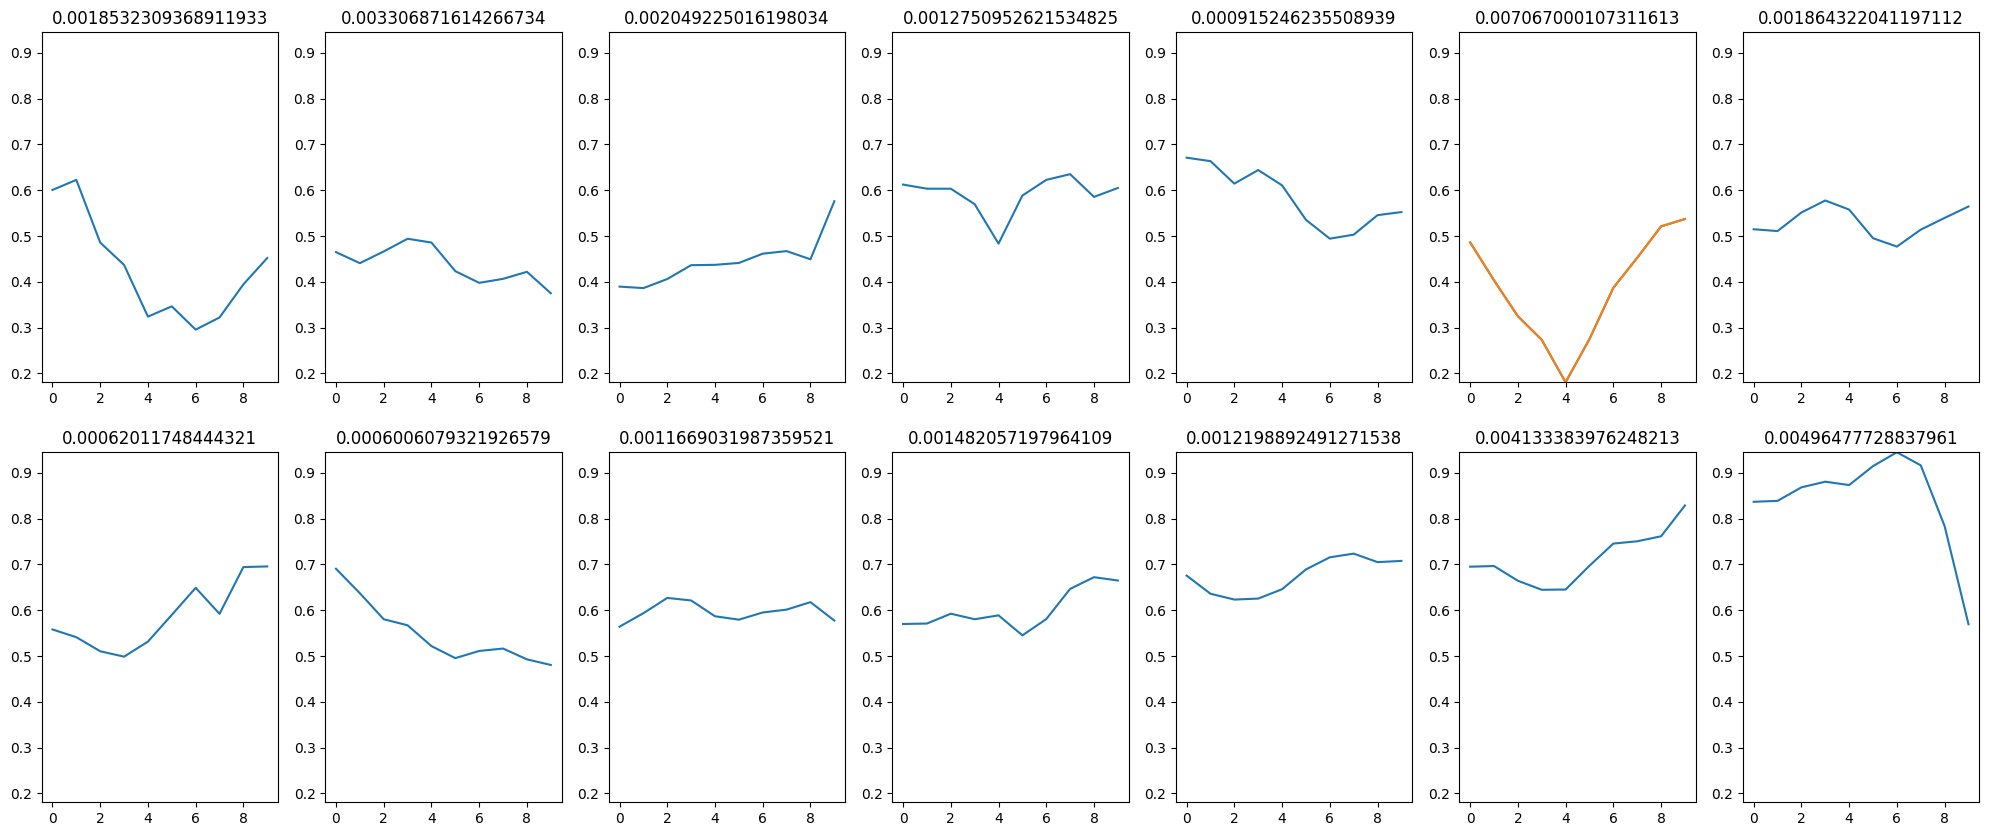

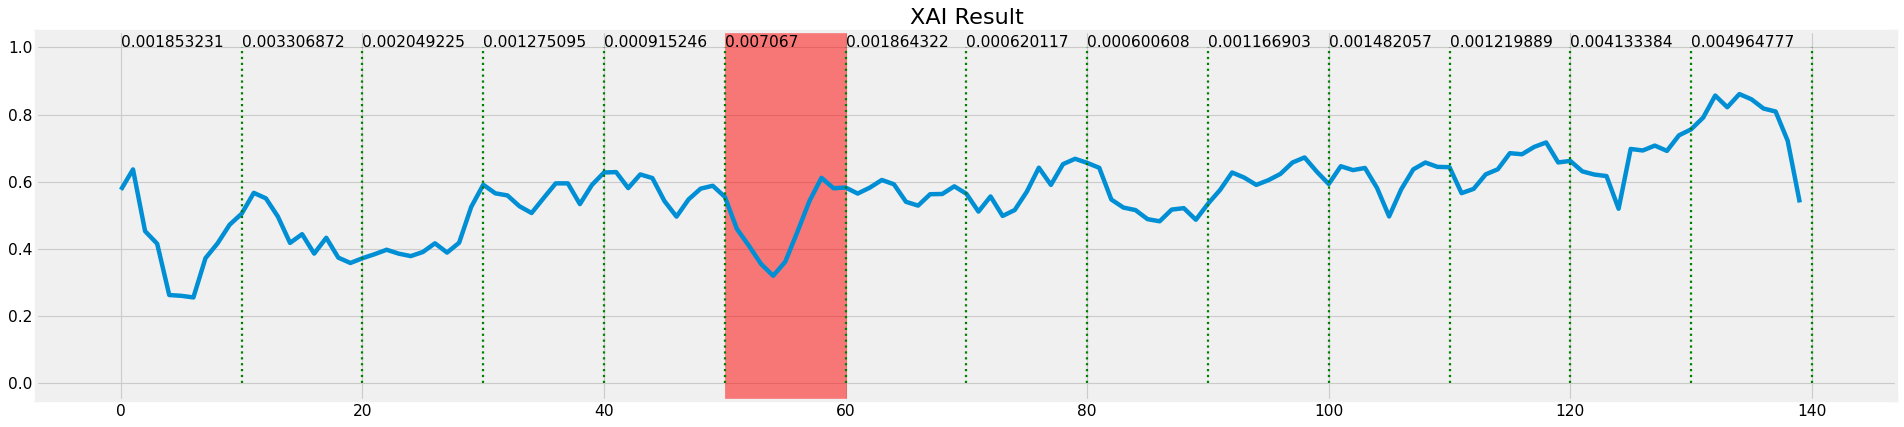

In [ ]:

#=====================================================================Import Llibraries========================================================================
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import where, random
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.python.framework.ops import disable_eager_execution
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.pyplot import figure
from sklearn.metrics import auc

from sklearn.neighbors._kde import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from cvxopt import matrix, solvers
import sklearn.metrics.pairwise as smp


#==========Data Preprocessing ============#

!unzip ECG5000.zip

!cat ECG5000_TRAIN.txt ECG5000_TEST.txt >ecg_final.txt
!head ecg_final.txt
df=pd.read_csv('ecg_final.txt',sep='  ',header=None)
df=df.add_prefix('c')
df['c0']=df['c0'].apply(lambda x: 1 if(x>1) else 0)

train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:,0:1], test_size=0.2, random_state=111)
scaler=MinMaxScaler()
data_scaled=scaler.fit(train_data)
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

normal_train_data = train_data_scaled[train_data_scaled[:,0]==0]
anomaly_train_data = train_data_scaled[train_data_scaled[:,0]==1]
normal_test_data = test_data_scaled[test_data_scaled[:,0]==0]
anomaly_test_data = test_data_scaled[test_data_scaled[:,0]==1]

normal_train_data = normal_train_data[:,1:]
anomaly_train_data = anomaly_train_data[:,1:]
normal_test_data = normal_test_data[:,1:]
anomaly_test_data = anomaly_test_data[:,1:]
train_data_scaled = train_data_scaled[:,1:]
test_data_scaled = test_data_scaled[:,1:]

normal_train_data = normal_train_data.reshape(len(normal_train_data), normal_train_data.shape[1],1)
anomaly_train_data = anomaly_train_data.reshape(len(anomaly_train_data), anomaly_train_data.shape[1],1)
train_data_scaled = train_data_scaled.reshape(len(train_data_scaled), train_data_scaled.shape[1],1)
test_data_scaled = test_data_scaled.reshape(len(test_data_scaled), test_data_scaled.shape[1],1)
normal_test_data = normal_test_data.reshape(len(normal_test_data), normal_test_data.shape[1],1)
anomaly_test_data = anomaly_test_data.reshape(len(anomaly_test_data), anomaly_test_data.shape[1],1)


#=============== Design the Transformer-based Autoencoder===============#
input_data = keras.Input(shape=(normal_train_data.shape[1]))

input_shape =input_data
num_patches = 1
projection_dim = 10
num_heads =2
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 2
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Normalization(),

    ],
    name="data_augmentation",
)

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
@tf.keras.utils.register_keras_serializable()

#Patch Encoder
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim=6,name=None,**kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.num_patches = num_patches
    def build(self,input_shape):
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim )
    def get_config(self):
        config = super(PatchEncoder, self).get_config()
        config.update({"num_patches": self.num_patches,
                })
        return config

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# funtion to sample form distribution in case of VAE
def sample(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

#loss function
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)


#hyper-parameters
latent_dim = 10
encoder_inputs= layers.Input(shape=(normal_train_data.shape[1],1))
# Augment data.
augmented = data_augmentation(encoder_inputs)
encoded_patches = PatchEncoder(num_patches, projection_dim)(augmented)

# Create multiple layers of the Transformer block.
for _ in range(transformer_layers):
    # Layer normalization 1.
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    # Create a multi-head attention layer.
    attention_output = layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=projection_dim, dropout=0.1
    )(x1, x1)
    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])

    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
    # MLP.
    x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x3, x2])

trans_shape = K.int_shape(encoded_patches) #Shape of conv to be provided to decoder
#Flatten
x = Flatten()(encoded_patches)
x = Dense(100, activation='relu')(x)

encoder = Model(encoder_inputs, x, name='encoder')
encoder.summary()
# decoder model
latent_inputs = Input(shape=(x.shape[1],), name='z_sampling')
x = Dense(trans_shape[1]*trans_shape[2], activation='relu')(latent_inputs)
x = Reshape((trans_shape[1], trans_shape[2]))(x)

x = Dense(100,  activation='relu')(x)

outputs = Dense(1,  activation='sigmoid', name='decoder_output')(x)
# Instantiate the decoder model:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
outputs = decoder(encoder(encoder_inputs))
vae_model = Model(encoder_inputs, outputs, name='vae_mlp')

opt = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.5)



#============Compile the Autoencoder=================#

vae_model.compile(optimizer=opt, loss='mse')
vae_model.summary()

# Finally, we train the model:
start = time.time()
results = vae_model.fit(normal_train_data, normal_train_data,
                        shuffle=True,
                        epochs=3,

                        validation_data=(train_data_scaled,train_data_scaled),
                        batch_size=7)

print("Total time: ", time.time() - start, "seconds")

reconstructions = vae_model.predict(normal_test_data)

mae_vector = get_error_term(reconstructions, normal_test_data, _rmse=False)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)
plt.hist(mae_vector , bins=50)
threshold=np.mean(mae_vector)+2.3*np.std(mae_vector)

reconstructions_an=vae_model.predict(anomaly_test_data)
mae_vector_an = get_error_term(reconstructions_an,anomaly_test_data, _rmse=False)
plt.hist(mae_vector_an , bins=50)

plt.hist(mae_vector_an , bins=50, label = 'abnormal')
plt.hist(mae_vector, bins=50, label = 'normal')
plt.axvline(threshold, color = 'r', linewidth = 3, linestyle = 'dashed', label = '{:0.3f}'.format(threshold))
plt.show()

reconstructions_asc=vae_model.predict(test_data_scaled)
mae_vector_an = get_error_term(reconstructions_asc,test_data_scaled, _rmse=False)
anomalies = (mae_vector_an > threshold)

np.count_nonzero(anomalies) / len(anomalies)

print(classification_report(test_labels, anomalies))

#===========Other threshold==================#

plt.hist(mae_vector , bins=50)
threshold=np.mean(mae_vector)+.5*np.std(mae_vector)

plt.hist(mae_vector_an , bins=50, label='abnormal')
plt.hist(mae_vector , bins=50, label='normal')
plt.axvline(threshold,color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

reconstructions_asc=vae_model.predict(test_data_scaled)
mae_vector_an = get_error_term(reconstructions_asc,test_data_scaled, _rmse=False)
anomalies = (mae_vector_an > threshold)

np.count_nonzero(anomalies) / len(anomalies)
print(classification_report(test_labels, anomalies))


In [ ]:
#=============SVDD With Gaussian Kernel and Grid Search for bandwidth===================#

class SVDD():

    def __init__(self, parameters):

        """
        DESCRIPTION

        --------------------------------------------------
        INPUT
          parameters
             "positive penalty": positive penalty factor
             "negative penalty": negative penalty factor
             "kernel"          : kernel function
             "option"          : some options


        """
        self.parameters = parameters



    def train(self, data, label):

        """
        DESCRIPTION

        Train SVDD model

        --------------------------------------------------
        Reference
        Tax, David MJ, and Robert PW Duin.
        "Support vector data description."
        Machine learning 54.1 (2004): 45-66.

        --------------------------------------------------
        model = train(data, label)

        --------------------------------------------------
        INPUT
        data        Training data (n*d)
                        n: number of samples
                        d: number of features
        label       Training label (n*1)
                        positive: 1
                        negative: -1

        OUTPUT
        model       SVDD hypersphere
        --------------------------------------------------

        """
        start_time = time.time()

        label = np.array(label, dtype = 'int')
        if np.abs(np.sum(label)) == data.shape[0]:
            self.labeltype = 'single'
        else:
            self.labeltype = 'hybrid'

        # index of positive and negative samples
        pIndex = label[:,0] == 1
        nIndex = label[:,0] == -1

        # threshold for support vectors
        threshold = 1e-7

        # compute the kernel matrix
        K = self.getMatrix(data, data)

        # solve the Lagrange dual problem
        alf, obj, iteration = self.quadprog(K, label)

        # find the index of support vectors
        sv_index = np.where(alf > threshold)[0][:]

        # support vectors and alf
        sv_value = data[sv_index, :]
        sv_alf = alf[sv_index]

        # compute the center of initial feature space
        center = np.dot(alf.T, data)

        ''''
        compute the radius: eq(15)

        The distance from any support vector to the center of
        the sphere is the hypersphere radius.
        Here take the 1st support vector as an example.

        '''
        # the 1st term in eq(15)
        used = 0
        term_1 = K[sv_index[used], sv_index[used]]

        # the 2nd term in eq(15)
        term_2 = -2*np.dot(K[sv_index[used], :], alf)

        # the 3rd term in eq(15)
        term_3 = np.dot(np.dot(alf.T, K), alf)

        # R
        radius = np.sqrt(term_1+term_2+term_3)

        end_time = time.time()
        timecost = end_time - start_time

        # numbers of positive and negative samples
        pData = np.sum(pIndex)/data.shape[0]
        nData = np.sum(nIndex)/data.shape[0]

        # number of support vectors
        nSVs = sv_index.shape[0]

        # radio of  support vectors
        rSVs = nSVs/data.shape[0]

        # store the results
        self.model = {"data"      : data        ,
                      "sv_alf"    : sv_alf      ,
                      "radius"    : radius      ,
                      "sv_value"  : sv_value    ,
                      "sv_index"  : sv_index    ,
                      "nSVs"      : nSVs        ,
                      "center"    : center      ,
                      "term_3"    : term_3      ,
                      "alf"       : alf         ,
                      "K"         : K           ,
                      "pIndex"    : pIndex      ,
                      "nIndex"    : nIndex      ,
                      "obj"       : obj         ,
                      "iteration" : iteration   ,
                      "timecost"  : timecost    ,
                      "pData"     : pData       ,
                      "nData"     : nData       ,
                      "rSVs"      : rSVs        ,
                      }

        # compute the training accuracy
        display_ = self.parameters["option"]["display"]
        self.parameters["option"]["display"] = 'off'
        _, accuracy = self.test(data, label)
        self.parameters["option"]["display"] = display_
        self.model["accuracy"] = accuracy

        # display training results
        if self.parameters["option"]["display"] == 'on':
            print('\n')
            print('*** SVDD model training finished ***\n')
            print('iter             = %d'       % self.model["iteration"])
            print('time cost        = %.4f s'   % self.model["timecost"])
            print('obj              = %.4f'     % self.model["obj"])
            print('pData            = %.4f %%'  % (100*self.model["pData"]))
            print('nData            = %.4f %%'  % (100*self.model["nData"]))
            print('nSVs             = %d'       % self.model["nSVs"])
            print('radio of nSVs    = %.4f %%'  % (100*self.model["rSVs"]))
            print('accuracy         = %.4f %%'  % (100*self.model["accuracy"]))
            print('\n')

    def test(self, data, label):

        """
        DESCRIPTION

        Test the testing data using the SVDD model

        distance = test(model, Y)

        --------------------------------------------------
        INPUT
        data        Test data (n*d)
                        n: number of samples
                        d: number of features
        label       Test label (n*1)
                        positive: 1
                        negative: -1

        OUTPUT
        distance    Distance between the test data and hypersphere
        --------------------------------------------------

        """

        start_time = time.time()
        n = data.shape[0]

        # compute the kernel matrix
        K = self.getMatrix(data, self.model["data"])

        # the 1st term
        term_1 = self.getMatrix(data, data)

        # the 2nd term
        tmp_1 = -2*np.dot(K, self.model["alf"])
        term_2 = np.tile(tmp_1, (1, n))

        # the 3rd term
        term_3 =  self.model["term_3"]

        # distance
        distance = np.sqrt(np.diagonal(term_1+term_2+term_3))

        # predicted label
        predictedlabel = np.mat(np.ones(n)).T
        fault_index = np.where(distance > self.model["radius"])[1][:]
        predictedlabel[fault_index] = -1

        # compute prediction accuracy
        accuracy = np.sum(predictedlabel == label)/n

        end_time = time.time()
        timecost = end_time - start_time
        if self.parameters["option"]["display"] == 'on':
        # display test results
            print('\n')
            print('*** SVDD model test finished ***\n')
            print('time cost        = %.4f s'   % timecost)
            print('accuracy         = %.4f %%'  % (100*accuracy))
            print('\n')


        return distance, accuracy

    def predict_label(self, data):

        """
        DESCRIPTION

        Test the testing data using the SVDD model

        distance = test(model, Y)

        --------------------------------------------------
        INPUT
        data        Test data (n*d)
                        n: number of samples
                        d: number of features
        label       Test label (n*1)
                        positive: 1
                        negative: -1

        OUTPUT
        distance    Distance between the test data and hypersphere
        --------------------------------------------------

        """

        start_time = time.time()
        n = data.shape[0]

        # compute the kernel matrix
        K = self.getMatrix(data, self.model["data"])

        # the 1st term
        term_1 = self.getMatrix(data, data)

        # the 2nd term
        tmp_1 = -2*np.dot(K, self.model["alf"])
        term_2 = np.tile(tmp_1, (1, n))

        # the 3rd term
        term_3 =  self.model["term_3"]

        # distance
        distance = np.sqrt(np.diagonal(term_1+term_2+term_3))

        # predicted label
        predictedlabel = np.mat(np.ones(n)).T
        fault_index = np.where(distance > self.model["radius"])[1][:]
        predictedlabel[fault_index] = -1

        end_time = time.time()
        timecost = end_time - start_time
        return predictedlabel

    def predict_labelV(self, data, cl):
        start_time = time.time()
        n = data.shape[0]

        # compute the kernel matrix
        K = self.getMatrix(data, self.model["data"])

        # the 1st term
        term_1 = self.getMatrix(data, data)

        # the 2nd term
        tmp_1 = -2 * np.dot(K, self.model["alf"])
        term_2 = np.tile(tmp_1, (1, n))

        # the 3rd term
        term_3 = self.model["term_3"]

        # distance
        distance = np.sqrt(np.diagonal(term_1 + term_2 + term_3))

        # predicted label
        predictedlabel = np.mat(np.ones(n)).T
        fault_indices = np.where(distance > cl)  # Use the condition directly
        predictedlabel[fault_indices, :] = -1  # Apply -1 to selected rows

        end_time = time.time()
        timecost = end_time - start_time
        return predictedlabel


    def quadprog(self, K, label):

        """
        DESCRIPTION

        Solve the Lagrange dual problem

        quadprog(self, K, label)

        --------------------------------------------------
        INPUT
        K         Kernel matrix
        label     training label


        OUTPUT
        alf       Lagrange multipliers

        --------------------------------------------------

        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b
        --------------------------------------------------

        """
        solvers.options['show_progress'] = False

        label = np.mat(label)
        K = np.multiply(label*label.T, K)

        # P
        n = K.shape[0]
        P = K+K.T

        # q
        q = -np.multiply(label, np.mat(np.diagonal(K)).T)

        # G
        G1 = -np.eye(n)
        G2 = np.eye(n)
        G = np.append(G1, G2, axis=0)

        # h
        h1 = np.mat(np.zeros(n)).T # lb
        h2 = np.mat(np.ones(n)).T
        if self.labeltype == 'single':
            h2[label == 1] = self.parameters["positive penalty"]

        if self.labeltype == 'hybrid':
            h2[label == 1] = self.parameters["positive penalty"]
            h2[label == -1] = self.parameters["negative penalty"]


        h = np.append(h1, h2, axis=0)

        # A, b
        A = np.mat(np.ones(n))
        b = 1.

        #
        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)
        A = matrix(A)
        b = matrix(b)

        #
        sol =solvers.qp(P, q, G, h, A, b)
        alf = np.array(sol['x'])
        obj = np.array(sol['dual objective'])
        iteration = np.array(sol['iterations'])

        return alf, obj, iteration

    def getMatrix(self, X, Y):

        """
        DESCRIPTION

        Compute kernel matrix

        K = getMatrix(X, Y)

        --------------------------------------------------
        INPUT
        X         data (n*d)
        Y         data (m*d)
        OUTPUT
        K         kernel matrix
        --------------------------------------------------


        type   -

        linear :  k(x,y) = x'*y+c
        poly   :  k(x,y) = (x'*y+c)^d
        gauss  :  k(x,y) = exp(-s*||x-y||^2)
        tanh   :  k(x,y) = tanh(g*x'*y+c)
        lapl   :  k(x,y) = exp(-s*||x-y||)

        degree -  d
        offset -  c
        width  -  s
        gamma  -  g

        --------------------------------------------------
        ker    -

        ker = {"type": 'gauss', "width": s}
        ker = {"type": 'linear', "offset": c}
        ker = {"type": 'ploy', "degree": d, "offset": c}
        ker = {"type": 'tanh', "gamma": g, "offset": c}
        ker = {"type": 'lapl', "width": s}

        """
        def gaussFunc():

            if self.parameters["kernel"].__contains__("width"):
                s =  self.parameters["kernel"]["width"]
            else:
                s = 2
            K = smp.rbf_kernel(X, Y, gamma=s)


            return K

        def linearFunc():

            if self.parameters["kernel"].__contains__("offset"):
                c =  self.parameters["kernel"]["offset"]
            else:
                c = 0

            K = smp.linear_kernel(X, Y)+c

            return K

        def ployFunc():
            if self.parameters["kernel"].__contains__("degree"):
                d =  self.parameters["kernel"]["degree"]
            else:
                d = 2

            if self.parameters["kernel"].__contains__("offset"):
                c =  self.parameters["kernel"]["offset"]
            else:
                c = 0

            K = smp.polynomial_kernel(X, Y, degree=d, gamma=None, coef0=c)

            return K

        def laplFunc():

            if self.parameters["kernel"].__contains__("width"):
                s =  self.parameters["kernel"]["width"]
            else:
                s = 2
            K = smp.laplacian_kernel(X, Y, gamma=s)

            return K

        def tanhFunc():
            if self.parameters["kernel"].__contains__("gamma"):
                g =  self.parameters["kernel"]["gamma"]
            else:
                g = 0.01

            if self.parameters["kernel"].__contains__("offset"):
                c =  self.parameters["kernel"]["offset"]
            else:
                c = 1

            K = smp.sigmoid_kernel(X, Y, gamma=g, coef0=c)

            return K

        kernelType = self.parameters["kernel"]["type"]
        switcher = {
                        "gauss"   : gaussFunc  ,
                        "linear"  : linearFunc ,
                        "ploy"    : ployFunc   ,
                        "lapl"    : laplFunc   ,
                        "tanh"    : tanhFunc   ,
                     }

        return switcher[kernelType]()


class Visualization():

    def testResult(svdd, distance):

        """
        DESCRIPTION

        Plot the test results

        testResult(model, distance)

        ---------------------------------------------------------------

        INPUT
        svdd             SVDD hypersphere
        distance         distance from test data to SVDD hypersphere

        ---------------------------------------------------------------

        """
        plt.rcParams['font.size'] = 15
        n = distance.shape[0]

        fig = plt.figure(figsize = (10, 6))
        ax = fig.add_subplot(1, 1, 1)
        radius = np.ones((n, 1))*svdd.model["radius"]
        ax.plot(radius,
                color ='r',
                linestyle = '-',
                marker = 'None',
                linewidth = 2,
                markeredgecolor ='k',
                markerfacecolor = 'w',
                markersize = 6)

        ax.plot(distance,
                color = 'k',
                linestyle = ':',
                marker='o',
                linewidth=1,
                markeredgecolor = 'k',
                markerfacecolor = 'C4',
                markersize = 6)

        ax.set_xlabel('Samples')
        ax.set_ylabel('Distance')

        ax.legend(["Radius","Distance"],
                  ncol = 1, loc = 0,
                  edgecolor = 'black',
                  markerscale = 2, fancybox = True)

        plt.show()

    def testResultV(svdd, distance, cl):

        """
        DESCRIPTION

        Plot the test results

        testResult(model, distance)

        ---------------------------------------------------------------

        INPUT
        svdd             SVDD hypersphere
        distance         distance from test data to SVDD hypersphere

        ---------------------------------------------------------------

        """
        plt.rcParams['font.size'] = 15
        n = distance.shape[0]

        fig = plt.figure(figsize = (10, 6))
        ax = fig.add_subplot(1, 1, 1)
        cl = np.ones((n, 1))*cl
        ax.plot(cl,
                color ='r',
                linestyle = '-',
                marker = 'None',
                linewidth = 2,
                markeredgecolor ='k',
                markerfacecolor = 'w',
                markersize = 6)

        ax.plot(distance,
                color = 'k',
                linestyle = ':',
                marker='o',
                linewidth=1,
                markeredgecolor = 'k',
                markerfacecolor = 'C4',
                markersize = 6)

        ax.set_xlabel('Samples')
        ax.set_ylabel('Distance')

        ax.legend(["Control Limit","Distance"],
                  ncol = 1, loc = 0,
                  edgecolor = 'black',
                  markerscale = 2, fancybox = True)

        plt.show()

    def testROC(label, distance):
        """
        DESCRIPTION

        Plot the test ROC

        testROC(label, distance)

        ---------------------------------------------------------------

        INPUT
        label            test label
        distance         distance from test data to SVDD hypersphere

        ---------------------------------------------------------------

        """
        if np.abs(np.sum(label)) == label.shape[0]:
            raise SyntaxError('Both positive and negative labels must be entered for plotting ROC curve.')

        # number of positive samples
        plt.rcParams['font.size'] = 15
        n_p = np.sum(label == 1)
        n_n = np.sum(label == -1)

        #  sort
        index = np.argsort(distance)
        label_sort = label[index]
        FP = np.cumsum(label_sort == -1)
        TP = np.cumsum(label_sort == 1)
        FPR = FP/n_n
        TPR = TP/n_p

        roc_auc = auc(FPR.T, TPR.T)

        fig = plt.figure(figsize = (6, 6))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(FPR.T, TPR.T,
                color ='C3',
                linestyle = '-',
                marker = 'None',
                linewidth = 5,
                markeredgecolor ='k',
                markerfacecolor = 'w',
                markersize = 6)

        ax.set_xlabel('False positive rate (FPR)')
        ax.set_ylabel('True positive rate (TPR)')
        ax.set_title('Area under the curve (AUC) = %.4f' %roc_auc)

        plt.grid()
        plt.show()


    def boundary(svdd, data, label, r=0.3, nn=2):
        """
        DESCRIPTION

        Plot the boundary

        boundary(svdd, data, label, r=0.3, nn=2)

        ---------------------------------------------------------------

        INPUT
        svdd             SVDD hypersphere
        data             training data
        label            training label
        r                radio of expansion (0<r<1)
        nn               number of grids

        ---------------------------------------------------------------

        """

        dim = data.shape[1]
        if dim!=2:
            raise SyntaxError('Visualization of decision boundary only supports for 2D data')

        # compute the range of grid
        numGrids = np.rint(data.shape[0]/nn).astype(int)  # number of grids
        x_range = np.zeros(shape=(numGrids, 2))
        for i in range(2):
            _tmp_ = (np.max(data[:, i])-np.min(data[:, i]))*r
            xlim_1 = np.min(data[:, i])-_tmp_
            xlim_2 = np.max(data[:, i])+_tmp_
            x_range[:, i] = np.linspace(xlim_1, xlim_2, numGrids)

        # grid
        xv, yv = np.meshgrid(x_range[:, 0], x_range[:, 1])

        num1 = xv.shape[0]
        num2 = yv.shape[0]
        distance = np.zeros(shape=(num1, num1))

        # calculate the grid scores
        print("Calculating the grid (%04d*%04d) scores...\n" %(num1, num2))

        display_ = svdd.parameters["option"]["display"]
        svdd.parameters["option"]["display"] = 'off'
        start_time = time.time()
        for i in range(num1):
            for j in range(num2):
                tmp = np.mat([xv[i, j], yv[i, j]])
                distance[i, j], _ = svdd.test(tmp, 1)
                # print('[feature 1: %06d]  [feature 2: %06d] \n' % (i+1,j+1))
        end_time = time.time()
        print('Grid scores completed. Time cost %.4f s\n' % (end_time-start_time))
        svdd.parameters["option"]["display"] = display_

        # plot the contour (3D)
        fig = plt.figure(figsize = (20, 6))

        ax3 = fig.add_subplot(1, 3, 1, projection='3d')
        # ax3 = ax3.axes(projection='3d')
        ada = ax3.plot_surface(xv, yv, distance, cmap=plt.cm.jet)
        ax3.contourf(xv, yv, distance, zdir='z', offset=np.min(distance)*0.9, cmap=plt.cm.coolwarm)
        ax3.set_zlim(np.min(distance)*0.9, np.max(distance)*1.05)
        # plt.colorbar(ada)



        # plot the contour (2D)
        # fig = plt.figure(figsize = (10, 8))
        ax1 = fig.add_subplot(1, 3, 2)

        ctf1 = ax1.contourf(xv, yv, distance, alpha = 0.8, cmap=plt.cm.jet)
        ctf2 = ax1.contour(xv, yv, distance, colors='black', linewidths=1)
        plt.clabel(ctf2, inline=True)
        # plt.colorbar(ctf1)

        # plot the boundary
        # fig = plt.figure(figsize = (10, 8))
        ax2 = fig.add_subplot(1, 3, 3)

        if svdd.labeltype == 'single':

            ax2.scatter(data[:,0], data[:,1],
                        color='green',marker='o',
                        edgecolor='black',alpha=0.5, zorder = 2)
            ax2.scatter(data[svdd.model["sv_index"],0], data[svdd.model["sv_index"],1],
                    facecolor='C2',marker='o',s = 144,linewidths = 2,
                    edgecolor='black', zorder = 2)

            ax2.contour(xv, yv, distance,[svdd.model["radius"]],
                              colors='C3', linewidths=5, zorder = 1)

            ax2.legend(["Training data", "Support vectors"],
                      ncol = 1, loc = 0,
                      edgecolor = 'black',markerscale = 1.2, fancybox = True)

        else:
            ax2.scatter(data[svdd.model["pIndex"],0], data[svdd.model["pIndex"],1],
                    facecolor='C0',marker='o', s = 100,linewidths = 2,
                    edgecolor='black', zorder = 2)
            ax2.scatter(data[svdd.model["nIndex"],0], data[svdd.model["nIndex"],1],
                    facecolor='C4',marker='s',s = 100,linewidths = 2,
                    edgecolor='black', zorder = 2)

            ax2.scatter(data[svdd.model["sv_index"],0], data[svdd.model["sv_index"],1],
                    facecolor='C2',marker='o',s = 144,linewidths = 2,
                    edgecolor='black', zorder = 2)

            ax2.contour(xv, yv, distance,[svdd.model["radius"]],
                              colors='C3', linewidths=5, zorder = 1)

            ax2.legend(["Training data (+)","Training data (-)", "Support vectors"],
                      ncol = 1, loc = 0,
                      edgecolor = 'black',markerscale = 1.2, fancybox = True)

        plt.show()

def control_limit(X_train, y_train, X_nor, gamma, M, beta, e10, e5):
  # X= data, 3-dim array,
  # Beta = 1/ARL0 - ARL0 = 100
  parameters = {
    "positive penalty": 0.9,
    "negative penalty": 0.7,
    "kernel": {"type": 'lapl', "width": gamma},
    "option": {"display": 'off'}}
  svdd = SVDD(parameters)
  svdd.train(X_train, y_train)
  h =[]
  y_nor = np.ones(X_nor.shape[0]).reshape(X_nor.shape[0], 1)
  for j in range(M): # M =10000
    X1 = np.array(random.choices(X_nor, k = X_nor.shape[0]))
    distance = svdd.test(X1, y_nor)[0].reshape(-1, 1)
    h_j = np.percentile(distance.tolist(), 100*(1- beta))
    h.append(h_j)
  return np.max(np.array(h)), np.mean(np.array(h)), np.percentile(h, 100*(1- e10)), np.percentile(h, 100*(1- e5))

def calculate_mewma(data, lambda_value):
    mewma_vectors = np.zeros_like(data)  # Initialize an array to store MEWMA statistics

    for i in range(data.shape[0]):  # Loop through each heartbeat measurement
        prev_mewma = 0.0  # Initialize the MEWMA statistic for the first time step

        for t in range(data.shape[1]):  # Loop through each time step
            x_t = data[i, t]  # Measurement at time step t
            mewma = lambda_value * x_t + (1 - lambda_value) * prev_mewma
            mewma_vectors[i, t] = mewma  # Store the MEWMA statistic for this time step

            prev_mewma = mewma  # Update the previous MEWMA statistic

    return mewma_vectors




In [ ]:
#==============Prepare data for SVDD==============#

train_lanel = np.where(train_labels == 1, -1, train_labels)
train_lanel2 = np.where(train_lanel == 0, 1, train_lanel)
test_lanel = np.where(test_labels == 1, -1, test_labels)
test_lanel2 = np.where(test_lanel == 0, 1, test_lanel)

predicted_train = vae_model.predict(train_data_scaled)
predicted = vae_model.predict(test_data_scaled)

params = {'bandwidth': np.linspace(3, 0.2, 10)}
grid = GridSearchCV(KernelDensity(), params, cv = 30)

e = (train_data_scaled- predicted_train)/np.max(train_data_scaled- predicted_train)
nsamples, nx, ny = e.shape
d2_e = e.reshape((nsamples,nx*ny))

#--------------Error Vectors Normal
predicted_nor = vae_model.predict(normal_train_data)
e3 = (normal_train_data- predicted_nor)/np.max(normal_train_data- predicted_nor)
nsamples, nx, ny = e3.shape
d2_e3 = e3.reshape((nsamples,nx*ny))
#  Grid for best h (bandwidth)
grid.fit(d2_e3)

h=grid.best_estimator_.bandwidth

# Calculate Error Vectors
e1=(test_data_scaled - predicted)/np.max(test_data_scaled - predicted)
nsamples1, nx1, ny1 = e1.shape
d2_e1 = e1.reshape((nsamples1,nx1*ny1))





74/74 [==============================] - 1s 13ms/step




*** SVDD model training finished ***

iter             = 13
time cost        = 98.7520 s
obj              = -0.9642
pData            = 58.9000 %
nData            = 41.1000 %
nSVs             = 92
radio of nSVs    = 2.3000 %
accuracy         = 97.9000 %




*** SVDD model test finished ***

time cost        = 0.7482 s
accuracy         = 98.2000 %




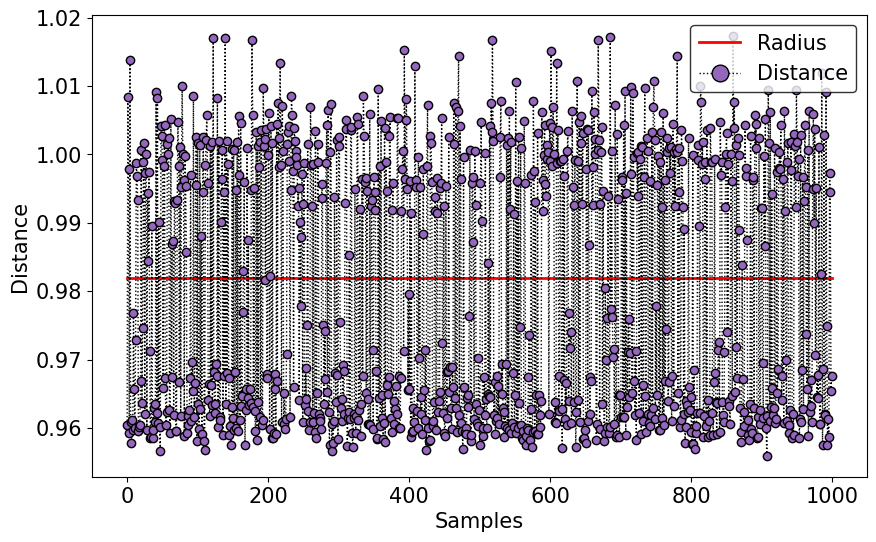

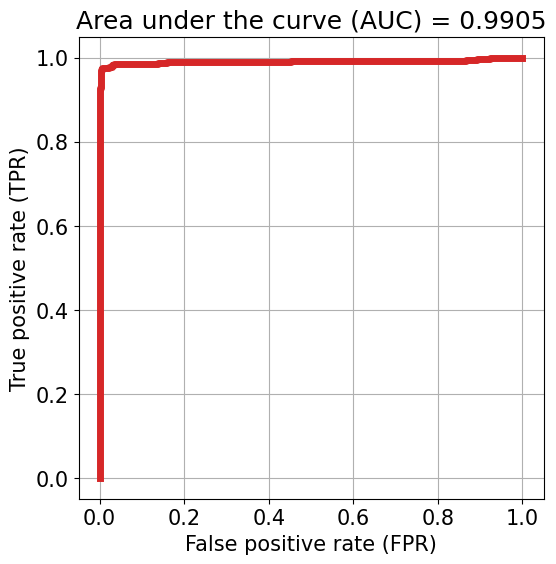

In [ ]:
# kernel list
kernelList = {#"1": {"type": 'gauss', "width": 0.05},
              #"2": {"type": 'linear', "offset": 0},
              #"3": {"type": 'ploy', "degree": 2, "offset": 0},
              #"4": {"type": 'tanh', "gamma": 1e-4, "offset": 0},
              "1": {"type": 'lapl', "width": h}
              }


for i in range(len(kernelList)):

    # set SVDD parameters
    parameters = {"positive penalty": 0.9,
                  "negative penalty": 0.7,
                  "kernel": kernelList.get(str(i+1)),
                  "option": {"display": 'on'}}

    # construct an SVDD model
    svdd = SVDD(parameters)

    # train SVDD model
    svdd.train(d2_e, train_lanel2)

    # test SVDD model
    distance, accuracy = svdd.test(d2_e1, test_lanel2)

    # visualize the results
    Visualization.testResult(svdd, distance)
    Visualization.testROC(test_lanel2, distance)


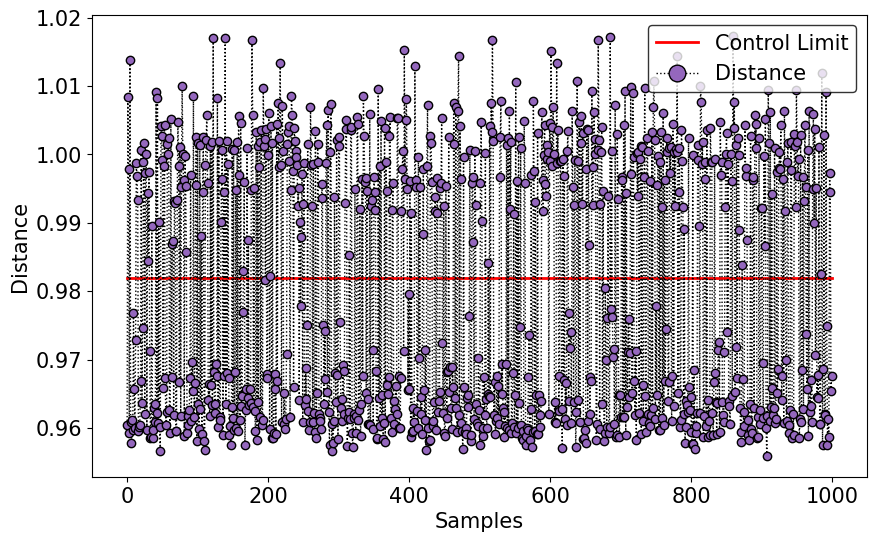

In [ ]:
Visualization.testResultV(svdd, distance, svdd.model["radius"][0][0])

In [ ]:
anomalies = (mae_vector_an > threshold)

In [ ]:
anomalies.shape

(1000, 1)

In [ ]:
print(classification_report(test_labels, anomalies))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       563
         1.0       0.96      1.00      0.98       437

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
(X_train, y_train) = (d2_e, train_lanel2)
X_nor = d2_e3

In [ ]:
gamma = h
M = 100
beta = 0.02
e10 = 0.1
e5 =0.05

In [ ]:
control_limit(X_train, y_train, X_nor, gamma, M, beta, e10, e5)

(0.9800467302082273, 0.9800467297582597, 0.980046730019331, 0.9800467301507001)

In [ ]:
(X_trainEWMA, y_trainEWMA) = (calculate_mewma(d2_e, 0.2), train_lanel2)
X_norEWMA = calculate_mewma(d2_e3, 0.2)

In [ ]:
control_limit(X_trainEWMA, y_trainEWMA, X_norEWMA, gamma, M, beta, e10, e5)

(0.9387337731089598, 0.9299441607231149, 0.9337736123338419, 0.936804068290436)

In [ ]:
#  Grid for best h (bandwidth)
grid.fit(calculate_mewma(d2_e3, 0.2))

h = grid.best_estimator_.bandwidth

In [ ]:
lambda_value = 0.2

In [ ]:
d2_eEWMA = calculate_mewma(d2_e, lambda_value)
d2_e1EWMA = calculate_mewma(d2_e1, lambda_value)



*** SVDD model training finished ***

iter             = 15
time cost        = 94.6820 s
obj              = -0.9046
pData            = 58.9000 %
nData            = 41.1000 %
nSVs             = 46
radio of nSVs    = 1.1500 %
accuracy         = 98.9250 %




*** SVDD model test finished ***

time cost        = 0.5495 s
accuracy         = 98.9000 %




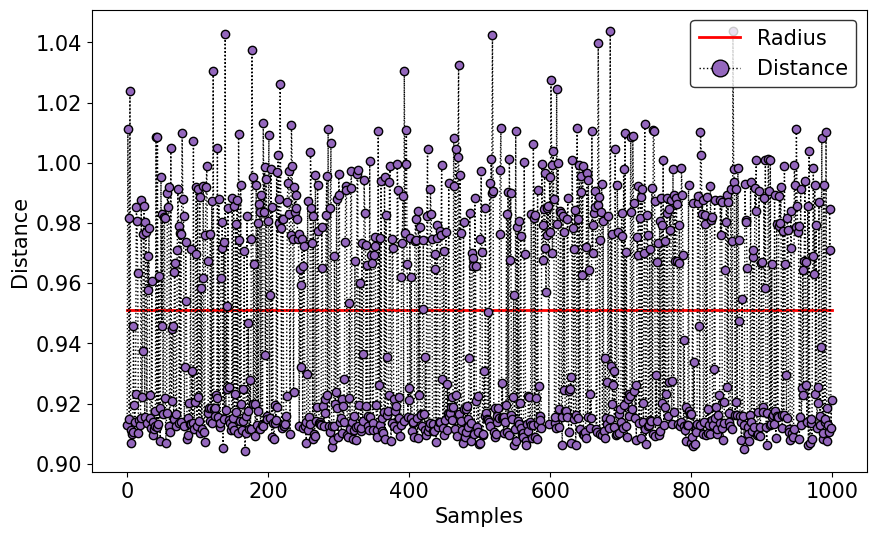

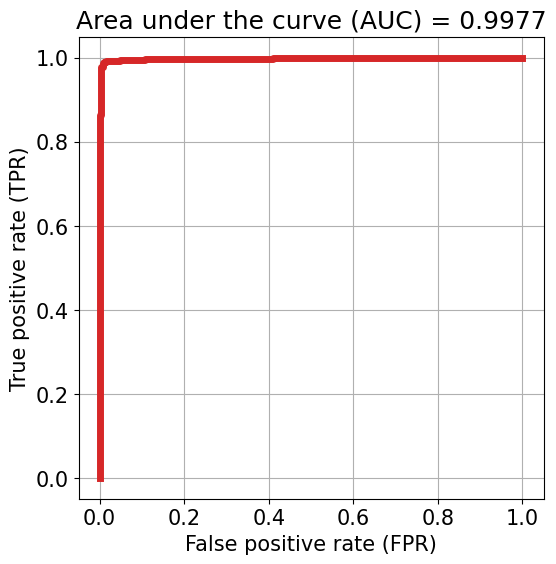

In [ ]:

# Set SVDD parameters for the specific kernel configuration
parameters = {
    "positive penalty": 0.9,
    "negative penalty": 0.7,
    "kernel": {"type": 'lapl', "width": h},
    "option": {"display": 'on'}
}

# Construct an SVDD model
svdd = SVDD(parameters)
# train SVDD model
svdd.train(d2_eEWMA, train_lanel2)

# test SVDD model
distance, accuracy = svdd.test(d2_e1EWMA, test_lanel2)

# visualize the results
Visualization.testResult(svdd, distance)
Visualization.testROC(test_lanel2, distance)
# this will work incase your data is two dimensional
#Visualization.boundary(svdd, d2_e, train_labels)

In [ ]:
y_d2_e3 = np.ones(d2_e3.shape[0]).reshape(d2_e3.shape[0], 1)

distance_nor = svdd.test(calculate_mewma(d2_e3, lambda_value), y_d2_e3)[0].reshape(-1, 1)

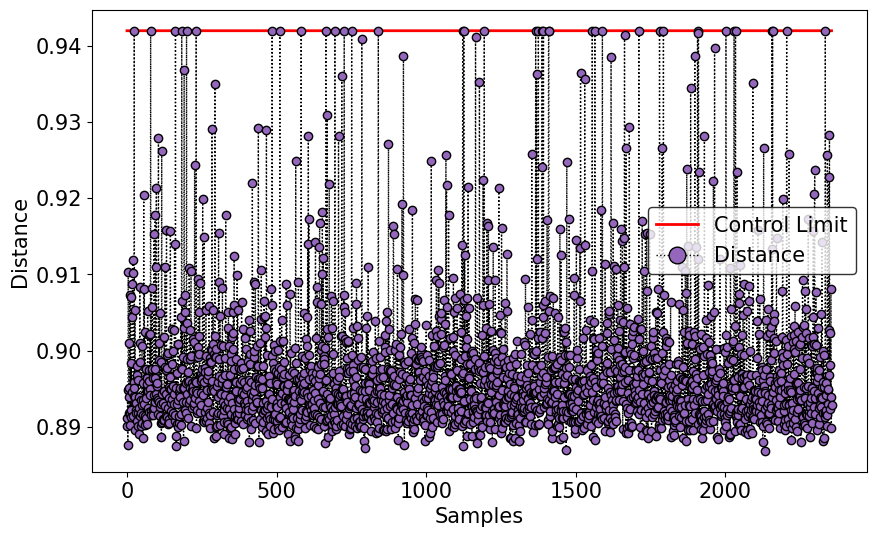

In [ ]:
Visualization.testResultV(svdd, distance_nor, svdd.model["radius"][0][0])

In [ ]:
cl = 0.936804068290436 # 5%
predict_testV = svdd.predict_labelV(d2_e1EWMA, cl)

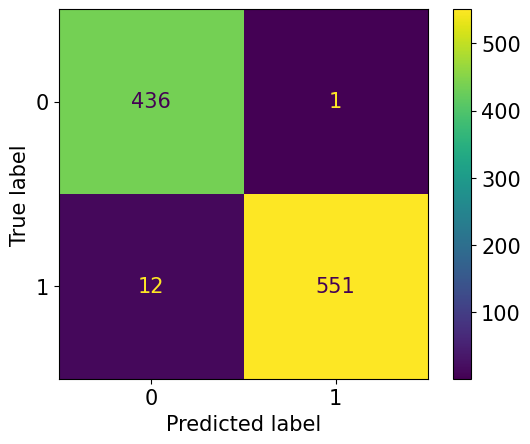

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cmV = confusion_matrix(np.asarray(test_lanel2), np.asarray(predict_testV))

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(cmV).plot()

In [ ]:
from sklearn.metrics import accuracy_score
#d2_e1EWMA, test_lanel2
accuracy_score(np.asarray(predict_testV), np.asarray(test_lanel2))


0.987